In [1]:
import os

import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import json
import glob
import random
import os, glob

In [2]:
n_folds = 5
subject_id, trial_id = 3, 2
models = ['linear (raw voltage)', 'linear (spectrogram)']
eval_names = ['pitch', 'pitch__reproduced', 'pitch_v2_raw', 'pitch_v2_enhanced']

# Load data from JSON files
performance_data = {}

# First load the regular models
for model in models:
    for eval_name in eval_names:
        model_prefix = 'linear' if 'linear' in model else 'cnn'
        spec_suffix = '_spectrogram_normalized' if 'spectrogram' in model else '_voltage'
        
        pattern = f'eval_results_ss_sm_enhanced_pitch/{model_prefix}{spec_suffix}_*subject{subject_id}_trial{trial_id}_{eval_name}.json'
        files = glob.glob(pattern)
        
        if files:
            with open(files[0], 'r') as f:
                data = json.load(f)
                # Extract AUROC scores for each fold
                auroc_scores = [fold_result['auroc'] for fold_result in data['fold_results']]
                performance_data[f"{model}_{eval_name}"] = auroc_scores
        else:
            print(f"Warning: No file found for {model} {eval_name}")
            performance_data[f"{model}_{eval_name}"] = [np.nan] * n_folds

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

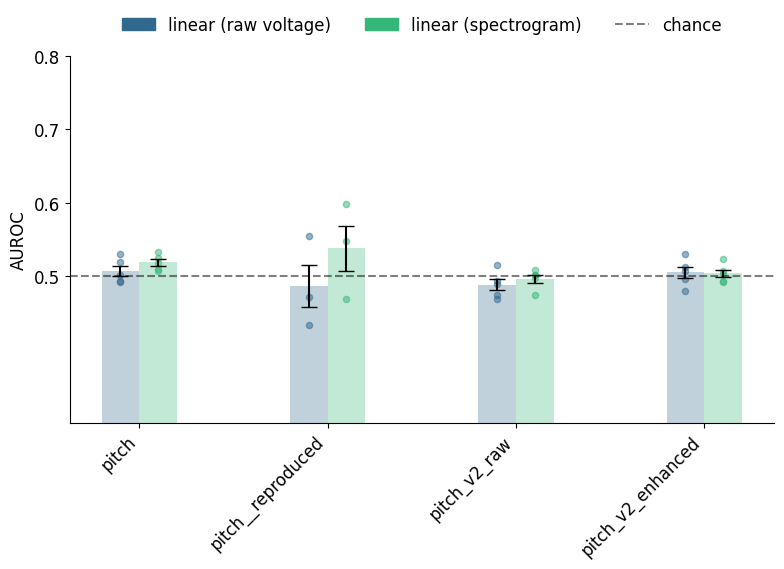

In [3]:
# Load and plot performance data
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up plot style
plt.rcParams['font.family'] = 'Arial'
plt.rcParams.update({'font.size': 12})

# Create figure
fig, ax = plt.subplots(figsize=(8,6))

# Model colors using viridis
model_colors = sns.color_palette("viridis", 2)

# Bar width
bar_width = 0.2

# Plot bars for each eval_name and model
for i, eval_name in enumerate(eval_names):
    for j, model in enumerate(models):
        key = f"{model}_{eval_name}"
        scores = performance_data[key]
        
        # Calculate mean and SEM
        mean = np.nanmean(scores)
        sem = np.nanstd(scores) / np.sqrt(np.sum(~np.isnan(scores)))
        
        # Plot bar
        x_pos = i + (j-0.5)*bar_width
        ax.bar(x_pos, mean, bar_width,
               yerr=sem,
               color=model_colors[j],
               alpha=0.3,
               capsize=6)
        
        # Plot individual points
        x_points = np.repeat(x_pos, len(scores))
        ax.scatter(x_points, scores, color=model_colors[j], alpha=0.5, s=20)

# Customize plot
ax.set_xticks(range(len(eval_names)))
ax.set_xticklabels(eval_names, rotation=45, ha='right')
ax.set_ylabel('AUROC')
ax.set_ylim(0.3, 0.8)
ax.set_yticks([0.5, 0.6, 0.7, 0.8])

# Add chance line
ax.axhline(y=0.5, color='black', linestyle='--', alpha=0.5)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add legend
handles = [plt.Rectangle((0,0),1,1, color=model_colors[i]) for i in range(len(models))]
handles.append(plt.Line2D([0], [0], color='black', linestyle='--', alpha=0.5))
ax.legend(handles, models + ["chance"], 
         loc='upper center',
         bbox_to_anchor=(0.5, 1.15),
         ncol=3,
         frameon=False)

plt.tight_layout()